In [2]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [4]:
df = pd.read_csv('../mbti_1.csv') 

In [5]:
#data cleaning

mbti_dict = {}

for index, row in df.iterrows():
    
    #remove urls
    post = re.sub(r"http\S+", "", row['posts'])
    
    #set of punctuations that we want to remove
    exclude = set(punctuation)
    
    #iterate through each letter which is not in set of punctuation
    letters = [ char for char in post if char not in exclude ]
    
    
    #join the letters back to words
    post_noPunc = "".join(letters)
    
    #make words lower case
    post_noPunc = post_noPunc.lower()
    #print(post_noPunc) 
  
    #remove words having less than 4 letters
    words = [word for word in post_noPunc.split() if len(word) > 3]
    post_final = " ".join(words)
    
    #dictionary with keys being type and value being text combined
    
    if row['type'] not in mbti_dict: 
        mbti_dict[row['type']] = [post_final]
    else:
        mbti_dict[row['type']].append(' ||| '+post_final) 
        

In [6]:
print(mbti_dict.keys())

dict_keys(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP', 'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'])


In [8]:
istp_string = ""
ENFP_string = " ".join(mbti_dict['ENFP'])
ENFP_wordlist = ENFP_string.split()
filtered_words = [word for word in ENFP_wordlist if word not in stopwords.words('english')]
#print(filtered_words)
counts = Counter(filtered_words)
#print(counts)

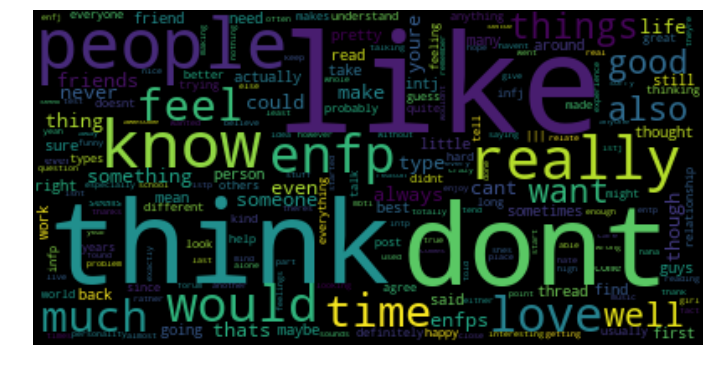

In [11]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=counts)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('enfp_wordcloud.png')
plt.show()


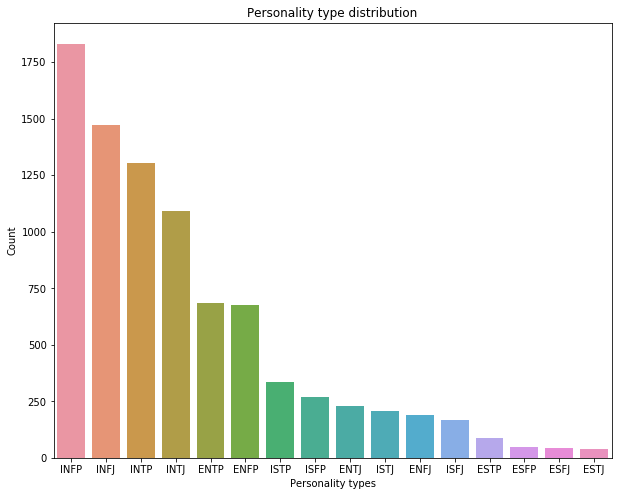

In [12]:
type_count = df['type'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(type_count.index, type_count.values)
plt.ylabel('Count')
plt.xlabel('Personality types')
plt.title('Personality type distribution')
plt.savefig('type_distribution')
plt.show()


# AMAZON DATASET

In [38]:
import json

df = []
count_prod=[]
count_user = []
file = open('kindle_reviews.json',"r")
for line in file:
    data = json.loads(line)
    count_user.append(data['reviewerID'])
    count_prod.append(data['asin'])
    

In [39]:
#unique product counts
prod_count = Counter(count_prod)

#unique users count
user_count = Counter(count_user)
